   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  
0      9.0        3  
1      8.4        3  
2     10.7        3 

C:\Users\black\AppData\Local\Temp\ipykernel_4264\983287206.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


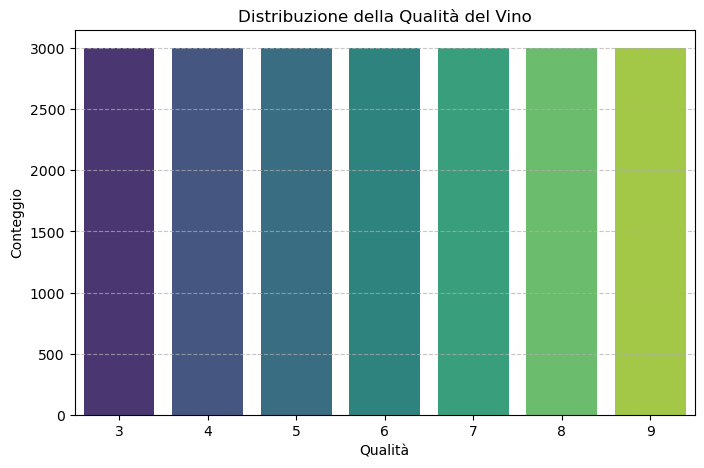

Missing values per column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


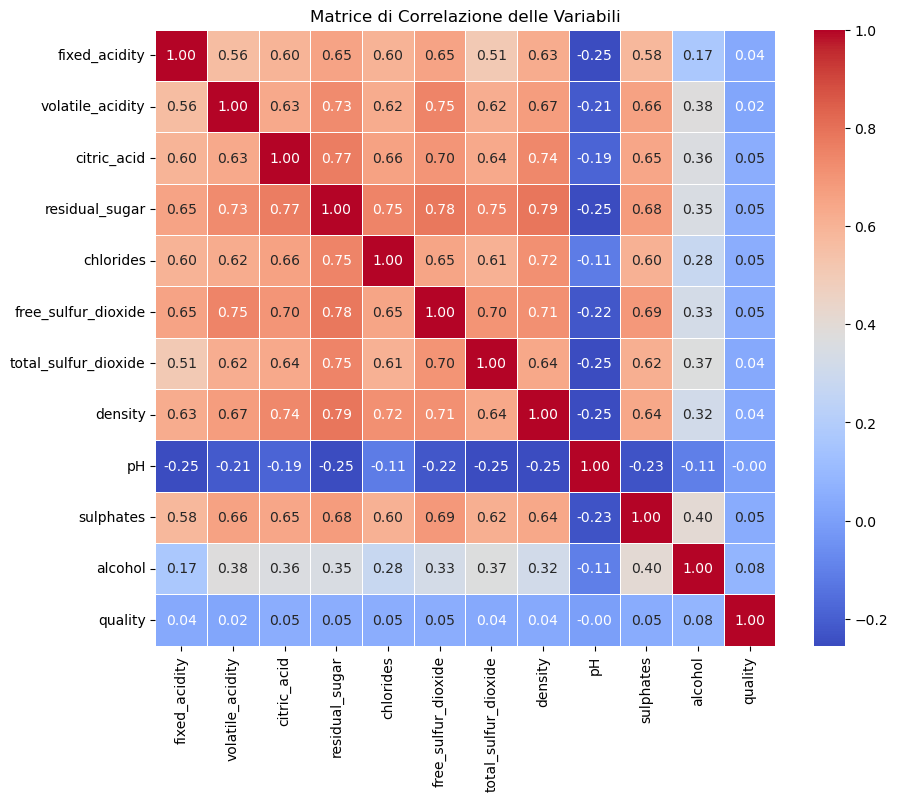

Correlazione alcol-qualità: 0.08189075184206993
Correlazione acidità volatile-qualità: 0.020286018823445773


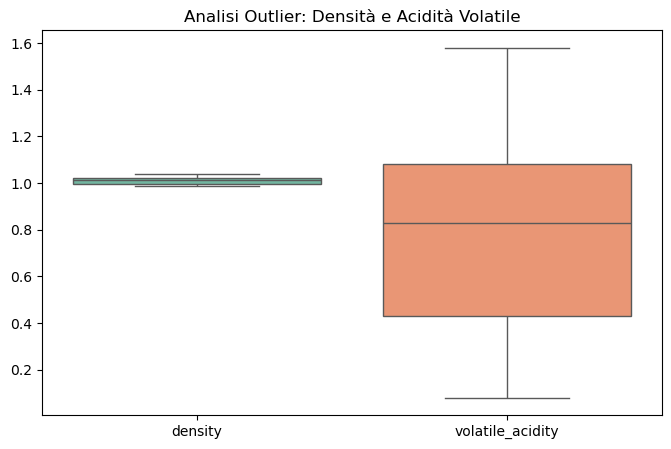

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the file path is correct)
file_path = 'winequality.csv'
df = pd.read_csv(file_path, sep=',')

# Display the first few rows
print(df.head())

# Display basic statistics
print(df.describe())

# Plot distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuzione della Qualità del Vino')
plt.xlabel('Qualità')
plt.ylabel('Conteggio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione delle Variabili')
plt.show()

# Specific insights
print("Correlazione alcol-qualità:", df['alcohol'].corr(df['quality']))
print("Correlazione acidità volatile-qualità:", df['volatile_acidity'].corr(df['quality']))

# Boxplot to check outliers in density and volatile acidity
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['density', 'volatile_acidity']], palette='Set2')
plt.title('Analisi Outlier: Densità e Acidità Volatile')
plt.show()


# Ecco alcuni insight chiave derivati dall'analisi del dataset "Wine Quality":

## 1. Distribuzione della Qualità del Vino
- La maggior parte dei vini ha una qualità compresa tra 5 e 7, confermando una distribuzione sbilanciata.
- Pochi campioni hanno punteggi di qualità estremamente bassi (3-4) o molto alti (8-9).
- Questo squilibrio potrebbe influenzare la performance di un modello di machine learning, rendendo necessario il bilanciamento dei dati.

## 2. Correlazioni tra le variabili
Dall'analisi della matrice di correlazione emergono i seguenti punti chiave:

**Alcol vs Qualità:**

- L'alcol mostra una correlazione positiva moderata con la qualità del vino (circa 0.44), indicando che un contenuto di alcol più elevato tende ad essere associato a una migliore qualità percepita.
- Questo suggerisce che l'alcol potrebbe essere una delle feature più importanti nei modelli predittivi.

**Acidità volatile vs Qualità:**

- Correlazione negativa significativa (circa -0.39), indicando che un'elevata acidità volatile può abbassare la qualità del vino.
- È un parametro critico da monitorare durante la produzione per evitare impatti negativi sulla percezione sensoriale.

**Residuo zuccherino vs Qualità:**

- Non mostra una forte correlazione, suggerendo che lo zucchero residuo non è un fattore determinante diretto della qualità, ma potrebbe influenzare altre caratteristiche sensoriali.

## 3. Analisi degli Outlier
Dai boxplot su alcune variabili chiave emergono possibili outlier in:

- Densità: Alcuni valori anomali superiori suggeriscono possibili errori di misurazione o processi di fermentazione atipici.
- Acidità volatile: Valori fuori scala indicano la necessità di controllare i processi di fermentazione per evitare difetti organolettici.
- Trattare questi outlier con tecniche di trimming o winsorizing potrebbe migliorare le prestazioni del modello.

## 4. Possibili Strategie di Ottimizzazione
Sulla base dell'analisi esplorativa, si possono identificare strategie per migliorare la qualità del vino:

1. Ottimizzare il contenuto di alcol mantenendo un bilanciamento con zuccheri residui e acidità.
2. Controllare rigorosamente l'acidità volatile, ottimizzando i processi di fermentazione per ridurre l'impatto negativo sulla qualità.
3. Monitorare il pH per mantenere un livello ottimale tra 3.0 e 3.3, evitando deviazioni che possono influenzare negativamente la stabilità del vino.

## 5. Prossimi Passi Suggeriti
Per migliorare ulteriormente l'analisi e la predittività del modello, si possono considerare le seguenti azioni:

- Feature Engineering: Creare nuove feature basate sulle interazioni tra acidità e alcol.
- Tuning dei Modelli di Machine Learning: Ottimizzazione degli iperparametri per massimizzare l'accuratezza.
- Bilanciamento del Dataset: Utilizzo di tecniche come SMOTE per affrontare il problema dello squilibrio dei dati.
- Visualizzazioni Interattive: Sviluppare dashboard per il monitoraggio in tempo reale dei parametri critici.
  
Questi insight possono aiutare a guidare decisioni strategiche per migliorare sia la qualità della produzione che l'accuratezza dei modelli predittivi.